간단한 신경망 만들기
  - 사인 함수 예측
  - 보스턴 집값을 예측: 회귀분석
  - 손글씨 분류 : 다중분류

사인함수를 3차 다항식의 계수를 이용해 예측


$ f(x) = ax^3 + bx^2 + cx + d $

여기서:
- $ a $, $ b $, $ c $, $ d $ 는 상수입니다.
- $ x $ 는 변수입니다.

In [11]:
# 사인함수 모델
import math
import torch
import matplotlib.pyplot as plt

# -3.14 ~ 3.14 사이의 값을 1000개   균등분포 (동일한 간격으로 1000개 생성)
x = torch.linspace(-math.pi, math.pi,1000)
y = torch.sin(x)

# 임의의 가중치(계수)를 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
a,b,c,d

(tensor(-0.5865), tensor(0.4807), tensor(0.4977), tensor(-0.3042))

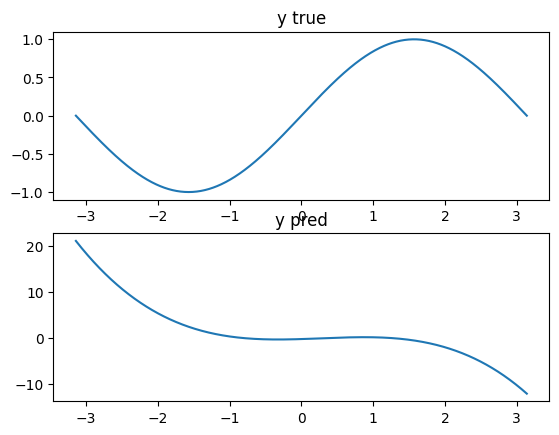

In [18]:
# 사인함수를 예측할 3차 다항식 정의
y_random = a*x**3 + b*x**2 + c*x +d

# 실제 정답( 사인함수 )
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)

# 임의의 가중치로 학습
plt.subplot(2,1,2)
plt.title('y pred')
plt.plot(x,y_random)

plt.show()

가중치를 학습시켜서 사인곡선 그리기
  - 신경망으로 학습

loss : 144.15536499023438
loss : 2.005472421646118
loss : 1.6492270231246948
loss : 1.357321858406067
loss : 1.117512583732605
loss : 0.9204531908035278
loss : 0.7584822773933411
loss : 0.6253182291984558
loss : 0.5158094167709351
loss : 0.42573052644729614
loss : 0.35161498188972473
loss : 0.29061752557754517
loss : 0.24040274322032928
loss : 0.19905351102352142
loss : 0.16499526798725128
loss : 0.13693472743034363
loss : 0.1138092651963234
loss : 0.0947456955909729
loss : 0.07902617752552032
loss : 0.06606027483940125


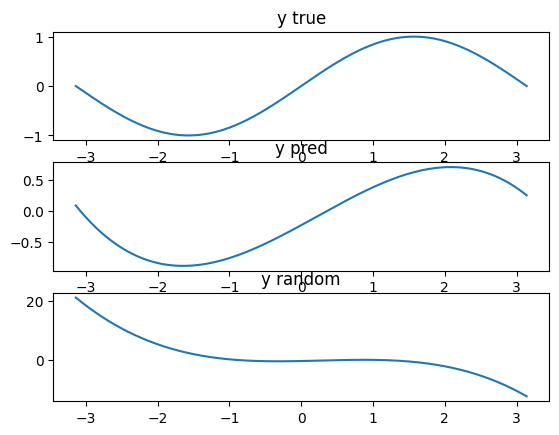

In [47]:
# -3.14 ~ 3.14 사이의 값을 1000개   균등분포 (동일한 간격으로 1000개 생성)
x = torch.linspace(-math.pi, math.pi,1000)
y = torch.sin(x)

# 임의의 가중치(계수)를 뽑아 y 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
learning_rate = 1e-6
# 학습을 2000번 진행
for epoch in range(2000):
  y_pred = a*x**3 + b*x**2 + c*x + d

  # 손실을 정의
  loss = torch.mean((y_pred - y)**2)
  if epoch % 100 == 0:
    print(f'loss : {loss}')
  # 기울기  (미 분)
  grade_y_pred = 2.0*(y_pred - y)
  grade_a = (grade_y_pred*x**3).sum()
  grade_b = (grade_y_pred*x**2).sum()
  grade_c = (grade_y_pred*x).sum()
  grade_d = (grade_y_pred).sum()

  # 가중치 업데이트
  a -= learning_rate * grade_a
  b -= learning_rate * grade_b
  c -= learning_rate * grade_c
  d -= learning_rate * grade_d

# 실제 정답( 사인함수 )
plt.subplot(3,1,1)
plt.title('y true')
plt.plot(x,y)

# 학습한 가중치로 그리기
plt.subplot(3,1,2)
plt.title('y pred')
plt.plot(x,y_pred)

# 랜덤한 가중치로 그리기
plt.subplot(3,1,3)
plt.title('y random')
plt.plot(x,y_random)

plt.show()

보스턴 집값 예측 : 회귀분석

In [48]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [49]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

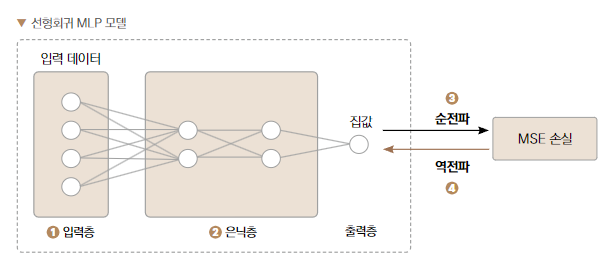

In [52]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [62]:
data.shape, target.shape

((506, 13), (506,))

In [89]:
# 모델정의 - 입력 - 은닉층 - 출력
input_data = data.shape[1]
model = nn.Sequential(
    nn.Linear( input_data, 100),
    nn.ReLU(),
    nn.Linear(100,1)
)

batch_size = 100
learning_rate = 1e-3
# 가중치를 수정하는 최적화 함수
optim = Adam(model.parameters(), lr=learning_rate)

# 학습 - 에포크 반복
for epoch in range(500):
  # 배치 반복
  for i in range(len(data) // batch_size):
    start = i*batch_size
    end = start+batch_size

    # 실수형 텐서로 변환
    x = torch.FloatTensor(data[start:end])
    y = torch.FloatTensor(target[start:end])

    # 가중치의 기울기를 0으로 초기화
    optim.zero_grad()
    preds = model(x).reshape(-1)  #  예측
    loss = nn.MSELoss()(preds, y)  # 손실계산
    loss.backward() # 오차 역전파
    optim.step() # 최적화 진행
  if epoch % 20 == 0:
    print(f"epoch{epoch} loss:{loss}")


epoch0 loss:288.8652038574219
epoch20 loss:21.161252975463867
epoch40 loss:17.482097625732422
epoch60 loss:15.971155166625977
epoch80 loss:15.215584754943848
epoch100 loss:14.375938415527344
epoch120 loss:13.898216247558594
epoch140 loss:13.247113227844238
epoch160 loss:13.247297286987305
epoch180 loss:12.782000541687012
epoch200 loss:15.45612907409668
epoch220 loss:12.138915061950684
epoch240 loss:11.825940132141113
epoch260 loss:11.718352317810059
epoch280 loss:12.939083099365234
epoch300 loss:11.725090026855469
epoch320 loss:10.56771469116211
epoch340 loss:10.357561111450195
epoch360 loss:10.396662712097168
epoch380 loss:10.758461952209473
epoch400 loss:11.35513687133789
epoch420 loss:11.029792785644531
epoch440 loss:10.176275253295898
epoch460 loss:9.60634994506836
epoch480 loss:9.229530334472656


성능평가하기

In [90]:
print(f'real target[100] : {target[100]}')
print(f'predict :{model(torch.FloatTensor( data[100]) )[0].item()}')

real target[100] : 27.5
predict :24.124832153320312


In [91]:
from sklearn.metrics import mean_squared_error  # 평균 제곱오차
y_preds = model(torch.FloatTensor(data) )
y_preds = y_preds.detach().numpy()
mean_squared_error(target, y_preds)

16.99581303789107